In [20]:
from BaseLine import LogisticRegression as LR
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
train = np.load('D:/meme_data/features/train.npz')
img_feature = train['img_fea']
text_feature= train['txt_fea']
label= train['label']


dev = np.load('D:/meme_data/features/dev.npz')
img_feature_dev = dev['img_fea']
text_feature_dev = dev['txt_fea']
label_dev= dev['label']

Training AUC ROC with image: 0.6772369378853963
Training AUC ROC with image: 0.55072
Training AUC ROC with text: 0.7684000601594225
Training AUC ROC with text: 0.6111519999999999
Training AUC ROC with image+text: 0.8606473454654835
Training AUC ROC with image+text: 0.6137119999999999


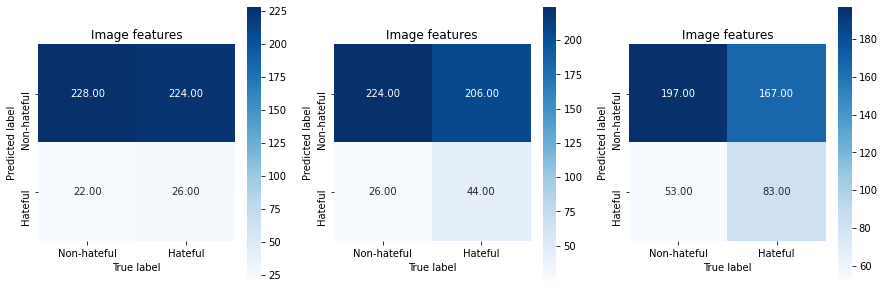

In [23]:
plt.figure(figsize=(15, 5))
axis_labels = ['Non-hateful', 'Hateful']

roc, roc_val, CM = LR.logistic_regression(img_feature, label, img_feature_dev, label_dev)
print('Training AUC ROC with image:', roc)
print('Training AUC ROC with image:', roc_val)

plt.subplot(131)
plt.title('Image features')
ax = sns.heatmap(CM.T, xticklabels=axis_labels, yticklabels=axis_labels,
    cmap='Blues', annot=True, fmt='.2f', square=True)
plt.xlabel("True label")
plt.ylabel("Predicted label")

#############################3
roc, roc_val, CM = LR.logistic_regression(text_feature, label, text_feature_dev, label_dev)
print('Training AUC ROC with text:', roc)
print('Training AUC ROC with text:', roc_val)

plt.subplot(132)
plt.title('Image features')
ax = sns.heatmap(CM.T, xticklabels=axis_labels, yticklabels=axis_labels,
    cmap='Blues', annot=True, fmt='.2f', square=True)
plt.xlabel("True label")
plt.ylabel("Predicted label")
#############################
X1 = (img_feature - img_feature.mean()) / img_feature.std()
X2 = (text_feature - text_feature.mean()) / text_feature.std()
X = np.concatenate((X1, X2), axis=1)

X1 = (img_feature_dev - img_feature.mean()) / img_feature.std()
X2 = (text_feature_dev - text_feature.mean()) / text_feature.std()
X_dev = np.concatenate((X1, X2), axis=1)

roc, roc_val, CM = LR.logistic_regression(X, label, X_dev, label_dev)
print('Training AUC ROC with image+text:', roc)
print('Training AUC ROC with image+text:', roc_val)

plt.subplot(133)
plt.title('Image features')
ax = sns.heatmap(CM.T, xticklabels=axis_labels, yticklabels=axis_labels,
    cmap='Blues', annot=True, fmt='.2f', square=True)
plt.xlabel("True label")
plt.ylabel("Predicted label")


plt.show()
